In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [35]:
(x_train , y_train) ,(x_test , y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
single_image = x_train[0]

In [38]:
single_image.shape

(28, 28)

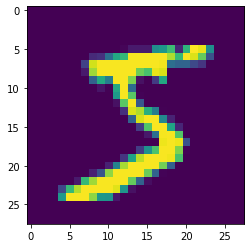

In [39]:
plt.imshow(single_image
           #, cmap="Greys"
          );

In [40]:
y_train.shape

(60000,)

In [41]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
#Since target labels are categorical, will one hot encode this using Tensorfloe Utils 

from tensorflow.keras.utils import to_categorical

In [43]:
y_cat_train = to_categorical(y_train)

In [44]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
y_cat_test = to_categorical(y_test)

In [46]:
y_cat_test.shape

(10000, 10)

In [47]:
## Scaling

x_train = x_train/255
x_test = x_test/255 

In [48]:
x_train.min()

0.0

In [49]:
x_train.max()

1.0

In [50]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
## Reshaping the train and test image

# batch_size , width , height , color_channels
x_train = x_train.reshape(60000, 28, 28 , 1)
x_test = x_test.reshape(10000, 28, 28 , 1)

### Modelling and Training

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D , MaxPool2D , Flatten

In [54]:
28*28

784

In [55]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

##Output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

## Early Stopping

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [58]:
model.fit(x_train , y_cat_train ,validation_data=(x_test, y_cat_test),epochs=10,
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 59s 990us/sample - loss: 0.1405 - accuracy: 0.9580 - val_loss: 0.0530 - val_accuracy: 0.9831
Epoch 2/10
60000/60000 [==============================] - 50s 837us/sample - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 3/10
60000/60000 [==============================] - 53s 890us/sample - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0425 - val_accuracy: 0.9860


In [59]:
metrics = pd.DataFrame(model.history.history)

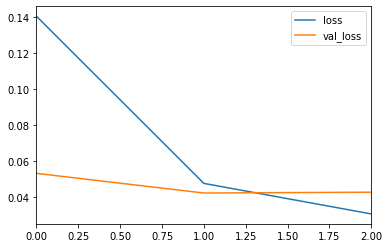

In [60]:
metrics[['loss', 'val_loss']].plot();

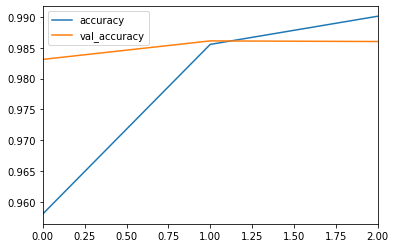

In [61]:
metrics[['accuracy', 'val_accuracy']].plot();

In [62]:
y_predictions = model.predict_classes(x_test)

In [63]:
y_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix , classification_report

In [65]:
confusion_matrix(y_test , y_predictions)

array([[ 979,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1130,    1,    1,    0,    1,    2,    0,    0,    0],
       [   3,    2,  993,    0,    1,    0,    1,   30,    2,    0],
       [   1,    0,    1,  999,    0,    1,    0,    6,    2,    0],
       [   1,    0,    0,    0,  967,    0,    1,    3,    0,   10],
       [   2,    0,    0,    9,    0,  878,    1,    0,    1,    1],
       [   8,    2,    0,    1,    3,    3,  939,    0,    2,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1024,    1,    0],
       [   4,    1,    0,    1,    0,    0,    1,    5,  960,    2],
       [   2,    2,    0,    0,    4,    3,    0,    6,    1,  991]],
      dtype=int64)

In [66]:
print(classification_report(y_test , y_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.96      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.95      1.00      0.97      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
## Evaluate with input random image

sample_image = x_test[0]

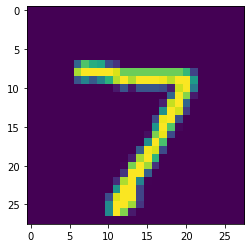

In [68]:
plt.imshow(sample_image.reshape(28,28));

In [70]:
#num_images , width , height and color_channels
model.predict_classes(sample_image.reshape(1,28,28,1))

array([7], dtype=int64)